### Importing relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

#### Load the data

In [2]:
data=pd.read_csv('3.12. Example.csv')
data.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


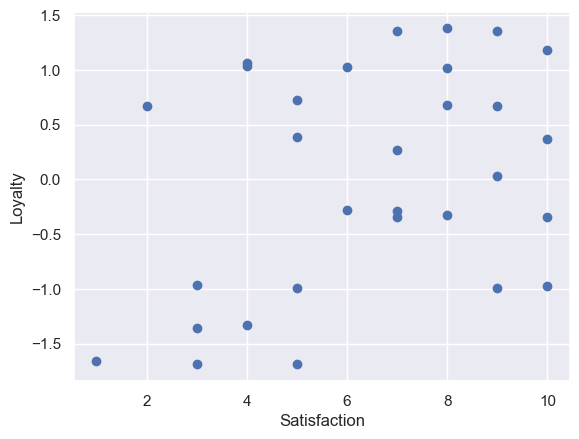

#### Select the features

In [5]:
x = data.copy()
x

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


#### Clustering 

In [6]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

#### Clustering results

In [7]:
clusters = x.copy()
clusters['cluster_pred'] = kmeans.fit_predict(x)

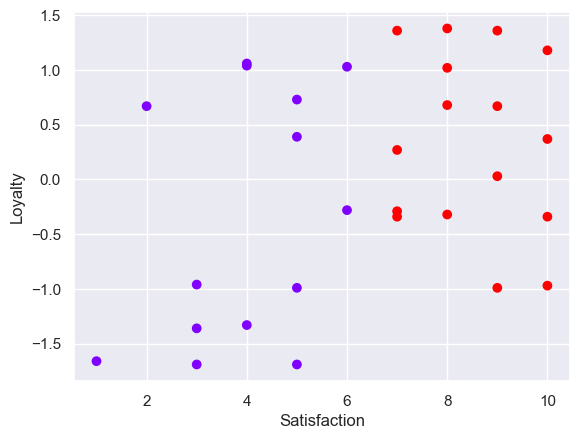

In [8]:
plt.scatter(clusters['Satisfaction'], clusters['Loyalty'], c=clusters['cluster_pred'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

#### Standardize the Variable

In [10]:
from sklearn import preprocessing 
x_scaled=preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

### VISUALIZING CLUSTERS

#### Elbow Method

In [11]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
wcss
    

[59.999999999999986,
 29.818973034723143,
 19.18756411022128,
 10.247181805928422,
 7.85810442178556,
 7.7867641013317925,
 6.080188013087202,
 5.636964949411863,
 4.57255354322467]

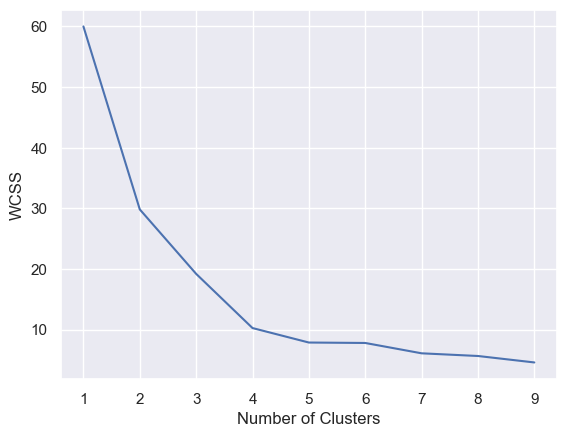

In [12]:
number_cluster = range(1, 10)
plt.plot(number_cluster, wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

#### Exploring clustering solutions and select the number of clusters

##### It is not clear the best K. We explore them below. k values are 2,3,4,5

In [13]:
kmeans_new = KMeans(4)
kmeans_new.fit(x_scaled)
clusters_new =  x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)
clusters_new.head()

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,2
1,6,-0.28,1
2,5,-0.99,2
3,7,-0.29,1
4,4,1.06,0


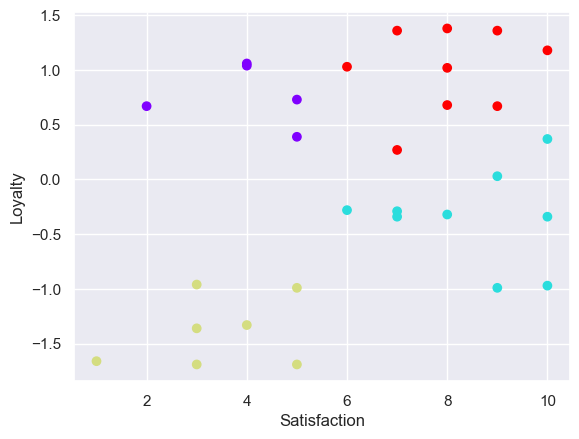

In [14]:
plt.scatter(clusters_new['Satisfaction'], clusters_new['Loyalty'], c=clusters_new['cluster_pred'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

### QUESTIONS | ANALYSIS

#### 1. What is the correlations between Satisfaction and Loyalty

In [23]:
correlation = x["Satisfaction"].corr(x["Loyalty"])
correlation

np.float64(0.36692871819428885)

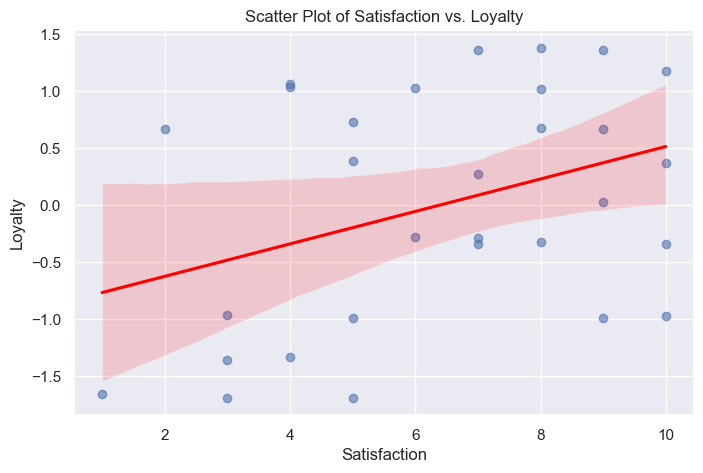

In [24]:
plt.figure(figsize=(8, 5))
sns.regplot(x=x["Satisfaction"], y=x["Loyalty"], scatter_kws={"alpha": 0.6}, line_kws={"color": "red"})
plt.xlabel("Satisfaction")
plt.ylabel("Loyalty")
plt.title("Scatter Plot of Satisfaction vs. Loyalty")
plt.show()